In [29]:
# To force reloading. Useful when editing python files
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

from processor import *
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from plotting import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Load profiler baseline

# Load sampling 1
base_path = '/Users/sebastian/Documents/PharoImages/illimani-rebench/data/sampling-1/2024-02-13H20m39'
df_1, metadata_df1 = load_df(base_path)

# Load sampling 50
base_path = '/Users/sebastian/Documents/PharoImages/illimani-rebench/data/sampling-50/2024-02-13H20m41'
df_50, metadata_df50 = load_df(base_path)

# Load sampling 100
base_path = '/Users/sebastian/Documents/PharoImages/illimani-rebench/data/sampling-100/2024-02-13H21m08'
df_100, metadata_df100 = load_df(base_path)

# most allocated classes
top_allocated_classes = get_top_allocated_classes(df_1)

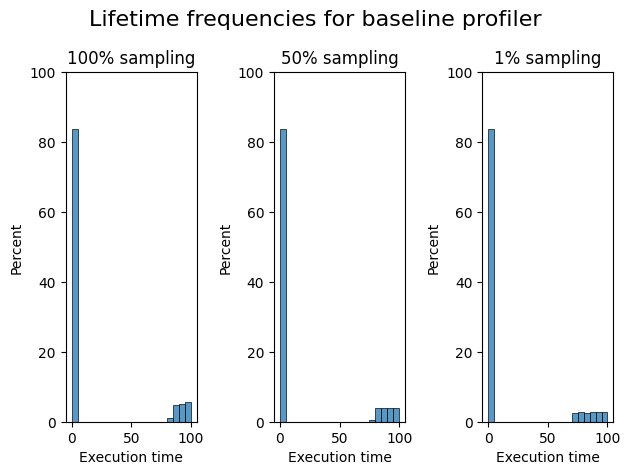

In [3]:
plot_relative_frequencies_histogram('baseline profiler', df_100, df_50, df_1)

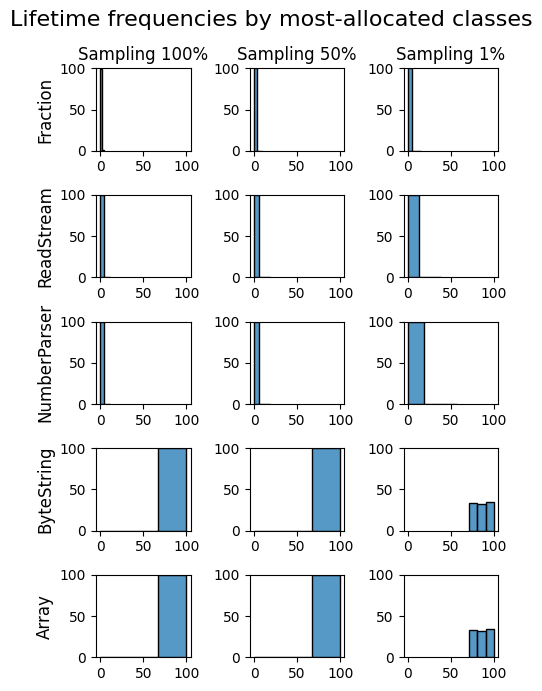

In [16]:
plot_lifetime_frequencies_by_class(top_allocated_classes, df_100, df_50, df_1, "Lifetime frequencies by most-allocated classes")

In [17]:
# Load profiler actionable

# Load actionable 1
base_path = '/Users/sebastian/Documents/PharoImages/illimani-rebench/data/actionable/sampling-1/2024-02-15H21m08'
df_1_a, metadata_df1_a = load_df(base_path)

# Load actionable 50
base_path = '/Users/sebastian/Documents/PharoImages/illimani-rebench/data/actionable/sampling-50/2024-02-15H21m00'
df_50_a, metadata_df50_a = load_df(base_path)

# Load actionable 100
base_path = '/Users/sebastian/Documents/PharoImages/illimani-rebench/data/actionable/sampling-100/2024-02-15H18m52'
df_100_a, metadata_df100_a = load_df(base_path)

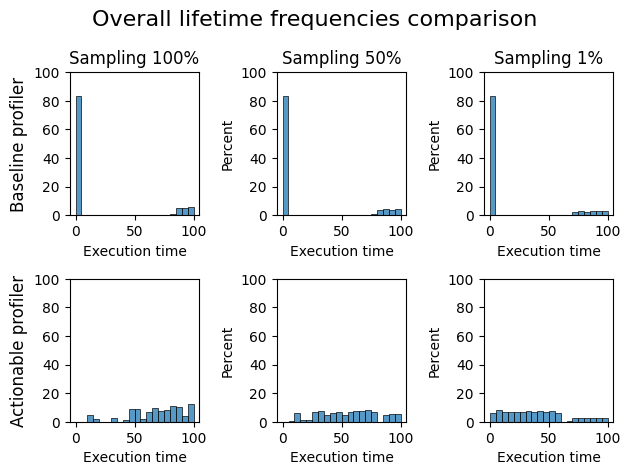

In [25]:
plot_relative_frequencies_histogram_comparison(df_100, df_50, df_1, df_100_a, df_50_a, df_1_a)

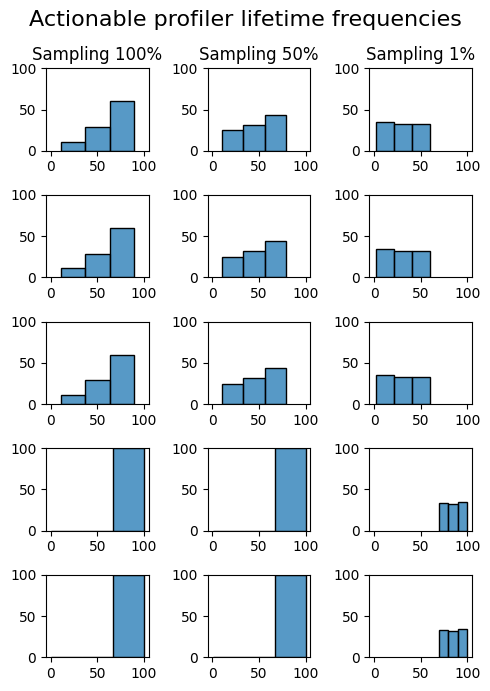

In [32]:
plot_lifetime_frequencies_by_class(top_allocated_classes, df_100_a, df_50_a, df_1_a, "Actionable profiler lifetime frequencies", False)

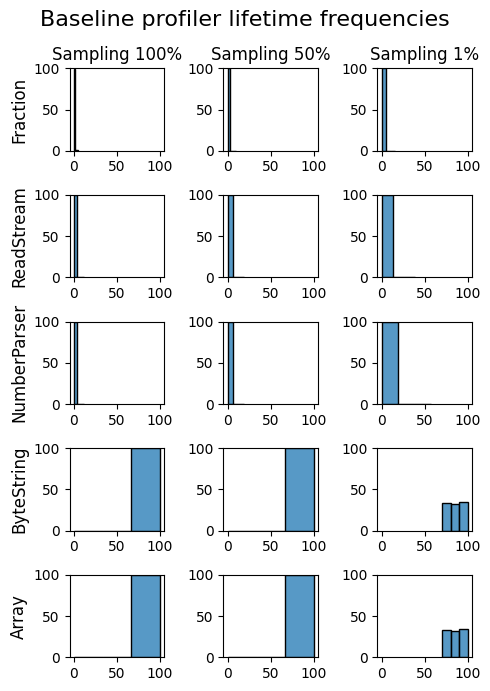

In [27]:
plot_lifetime_frequencies_by_class(top_allocated_classes, df_100, df_50, df_1, "Baseline profiler lifetime frequencies")

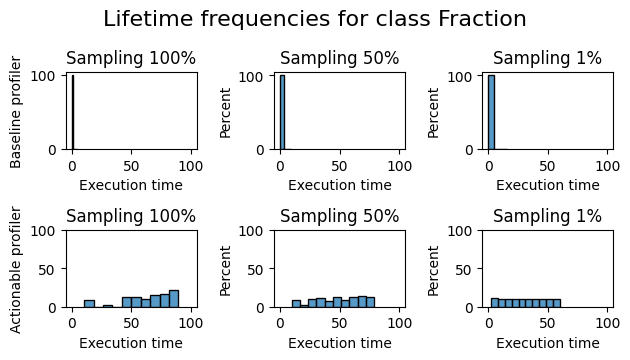

In [22]:
# OLD CODE. Keeping it as a reference of how to use matplotlib


# Frequencies by class baseline vs actionable profiler
# First class

fig = plt.figure(1)
gridspec.GridSpec(nrows=2, ncols= 3)
a_title = "Lifetime frequencies for class " + str(top_allocated_classes[0])

fig.suptitle(a_title, fontsize=16)

# 100 sampling
aaa = df_100.loc[ df_100['allocatedObjectClass'] == top_allocated_classes[0] ]
ax = plt.subplot2grid((3,3), (0,0), rowspan=1)
#title
ax.set_ylabel('Baseline profiler')
plot = sns.histplot(aaa['relativeLifetime'] , stat="percent", bins=3)
plot.set(xlim=(-5, 105), xlabel='Execution time', title='Sampling 100%')

# 50 sampling
aaa = df_50.loc[ df_50['allocatedObjectClass'] == top_allocated_classes[0] ]
plt.subplot2grid((3,3), (0,1), rowspan=1)
plot = sns.histplot(aaa['relativeLifetime'] , stat="percent", bins=3)
plot.set(xlim=(-5, 105), xlabel='Execution time', title='Sampling 50%')

# 1 sampling
aaa = df_1.loc[ df_1['allocatedObjectClass'] == top_allocated_classes[0] ]
plt.subplot2grid((3,3), (0,2), rowspan=1)
plot = sns.histplot(aaa['relativeLifetime'] , stat="percent", bins=3)
plot.set(xlim=(-5, 105), xlabel='Execution time', title='Sampling 1%')


# ACTIONABLE

# 100 sampling
aaa = df_100_a.loc[ df_100_a['allocatedObjectClass'] == top_allocated_classes[0] ]
ax = plt.subplot2grid((3,3), (1,0), rowspan=1)
#title
ax.set_ylabel('Actionable profiler')
plot = sns.histplot(aaa['relativeLifetime'] , stat="percent", bins=10)
plot.set(xlim=(-5, 105), ylim=(0, 100), xlabel='Execution time', title='Sampling 100%')

# 50 sampling
aaa = df_50_a.loc[ df_50_a['allocatedObjectClass'] == top_allocated_classes[0] ]
plt.subplot2grid((3,3), (1,1), rowspan=1)
plot = sns.histplot(aaa['relativeLifetime'] , stat="percent", bins=10)
plot.set(xlim=(-5, 105), ylim=(0, 100), xlabel='Execution time', title='Sampling 50%')

# 1 sampling
aaa = df_1_a.loc[ df_1_a['allocatedObjectClass'] == top_allocated_classes[0] ]
plt.subplot2grid((3,3), (1,2), rowspan=1)
plot = sns.histplot(aaa['relativeLifetime'] , stat="percent", bins=10)
plot.set(xlim=(-5, 105), ylim=(0, 100), xlabel='Execution time', title='Sampling 1%')

plt.tight_layout()
fig.align_ylabels()
plt.show()